# Oreinted FAST and Rotated BRIEF


## Features from Accelerated and Segments Test)

Given a pixel p in an array fast compares the brightness of p to surrounding 16 pixels that are in a small circle around p. Pixels in the circle is then sorted into three classes (lighter than p, darker than p or similar to p). If more than 8 pixels are darker or brighter than p than it is selected as a keypoint. So keypoints found by fast gives us information of the location of determining edges in an image.

FAST (Features from Accelerated Segment Test) is a popular and efficient corner detection algorithm used in computer vision and image processing. It is designed to identify key interest points or corners in an image. FAST is known for its speed and is commonly used in real-time applications such as object tracking, motion analysis, and image stitching. Here's an overview of the FAST corner detection algorithm:

1. Corner Detection Criterion:
        FAST operates by comparing the intensities of pixels in a circular neighborhood around a candidate pixel with a threshold.
        A pixel is considered a corner if there exists a contiguous set of pixels in the circle (in a specific pattern) that are all brighter or darker than the central pixel by at least a certain threshold value.

2. Algorithm Steps:
        For each pixel in the image, FAST examines a circular neighborhood of 16 surrounding pixels.
        The algorithm then checks a specific set of 12 of these 16 pixels (the selected pattern).
        If there are at least 9 contiguous pixels in the pattern that are all brighter or darker than the central pixel, the central pixel is considered a corner.

3. Thresholding:
        The choice of the threshold value is critical and can affect the performance of the detector.
        A higher threshold results in fewer corners being detected (more selective), while a lower threshold results in more corners (less selective).

4. Non-maximum Suppression:
        FAST often detects multiple corners in close proximity.
        A non-maximum suppression step is typically applied to remove redundant or non-maximum corners by selecting the strongest one among the nearby candidates.


In [1]:
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'FAST Image')

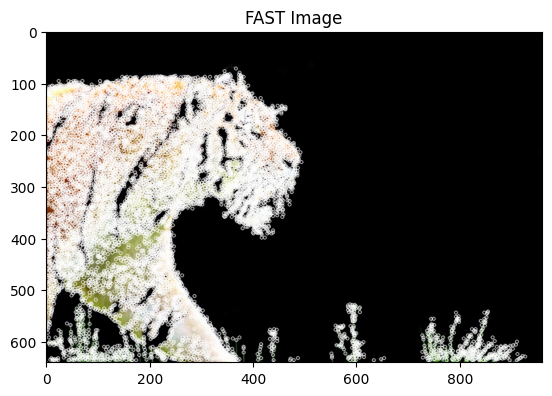

In [17]:
# Load an image
image_path = '../dataset/tiger.jpg'
image = cv2.imread(image_path)

# Convert BGR image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Create a FAST detector object
fast = cv2.FastFeatureDetector_create()

# Detect FAST keypoints
keypoints = fast.detect(image, None)

# Draw the keypoints on the image
result_image = cv2.drawKeypoints(image_rgb, keypoints, None, color=(255, 255, 255))

# Display the result
plt.imshow(result_image)
plt.title("FAST Image")


## Binary Robust Independent Elementary Features

Brief takes all keypoints found by the fast algorithm and convert it into a binary feature vector so that together they can represent an object. Binary features vector also know as binary feature descriptor is a feature vector that only contains 1 and 0. In brief, each keypoint is described by a feature vector which is 128–512 bits string.

Here's an overview of how the BRIEF descriptor works:

1. Feature Point Detection: Before computing BRIEF descriptors, you typically need to detect feature points (keypoints) in your image using a detector like FAST, Harris, or SIFT.

2. Pairwise Comparison: BRIEF operates by comparing pairs of pixel values around a keypoint. It selects a set of pairs based on a sampling pattern or a set of predefined pairs.

3. Binary Encoding: For each pair, BRIEF compares the pixel values. If the intensity of the first pixel is greater than the second, it assigns a "1" to that position in the binary string; otherwise, it assigns a "0."

4. Descriptor Generation: After comparing all pairs, you obtain a binary string, which serves as the BRIEF descriptor for that keypoint. This binary string encodes information about the local image patch around the keypoint.

5. Matching: To match keypoints between images, you can use simple bitwise operations like XOR to compute the Hamming distance between the binary strings. A smaller Hamming distance indicates a better match.

BRIEF is known for its speed and simplicity, but it has some limitations, such as sensitivity to image rotation and scale changes. To address these limitations, extensions like BRISK (Binary Robust Invariant Scalable Keypoints) combine BRIEF with scale-invariant feature detection.

# ORB

ORB performs as well as SIFT on the task of feature detection (and is better than SURF) while being almost two orders of magnitude faster. ORB builds on the well-known FAST keypoint detector and the BRIEF descriptor. Both of these techniques are attractive because of their good performance and low cost. ORB’s main contributions are as follows:
    • The addition of a fast and accurate orientation component to FAST
    • The efficient computation of oriented BRIEF features
    • Analysis of variance and correlation of oriented BRIEF features
    • A learning method for decorrelating BRIEF features under rotational invariance, leading to better performance in nearest-neighbor applications


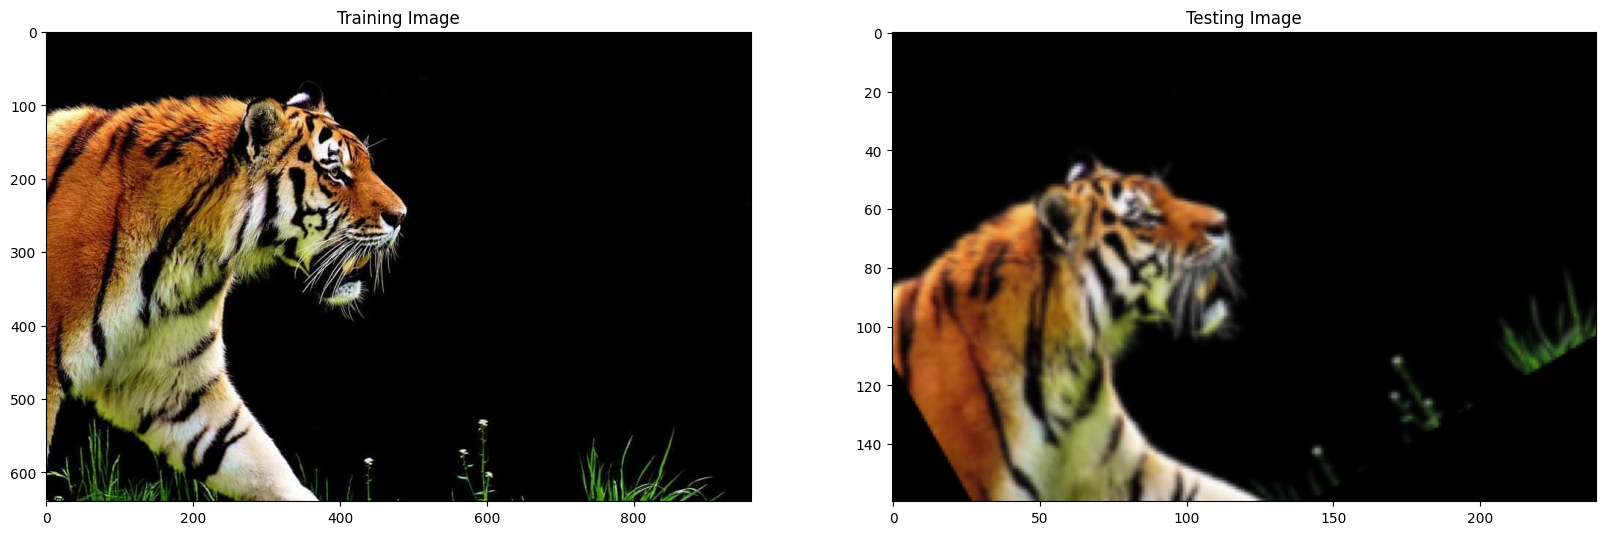

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread(image_path)

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)


Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  354


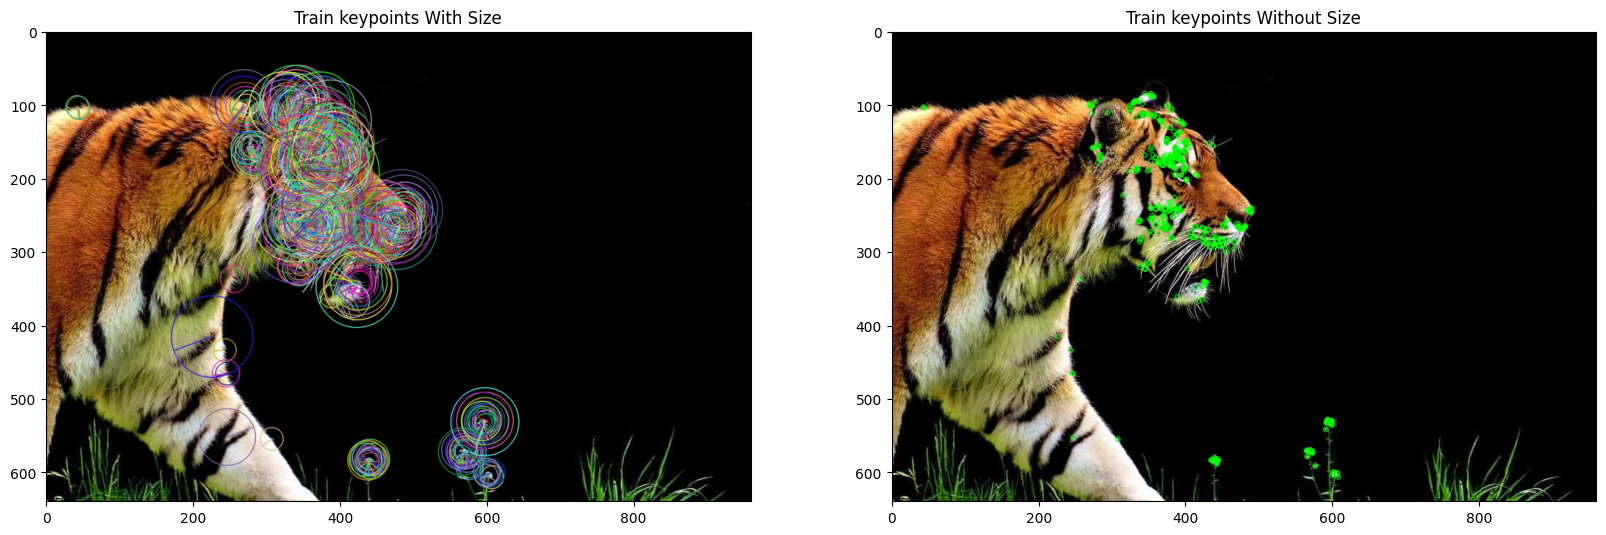

In [28]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

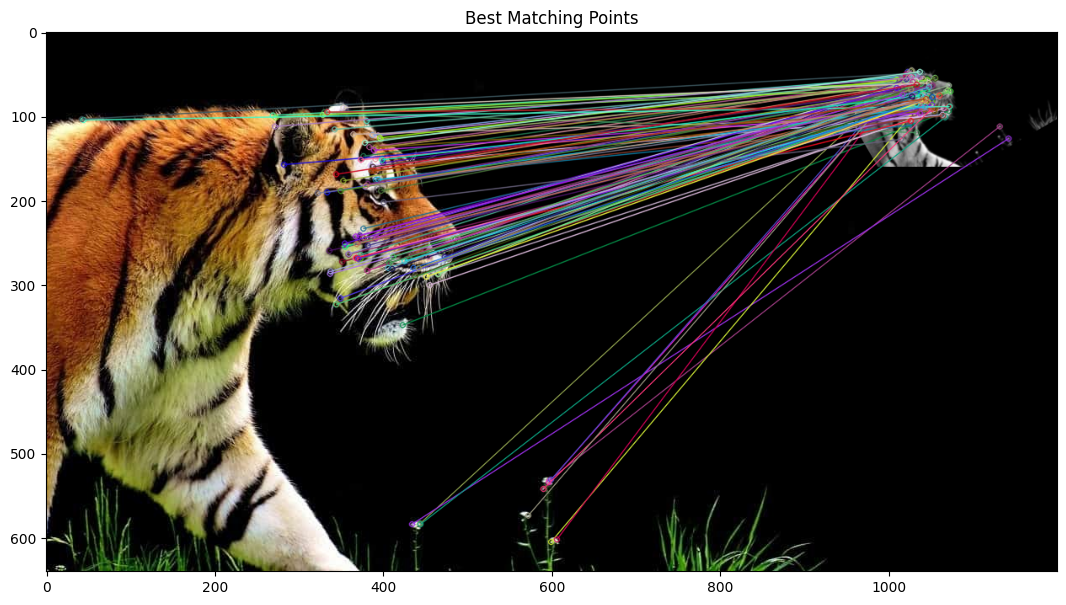


Number of Matching Keypoints Between The Training and Query Images:  112


In [29]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
